In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.exceptions import FitFailedWarning
from sklearn.decomposition import PCA

In [17]:
from google.colab import drive
drive.mount('/content/drive')

warnings.filterwarnings("ignore", category = FitFailedWarning)
warnings.filterwarnings("ignore", category = UserWarning)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
data = pd.read_csv('/content/drive/MyDrive/ML Project/train.csv')
train_data,test_data = train_test_split(data,test_size=0.2,random_state=42)
train_labels = train_data['Choice']
test_labels = test_data['Choice']
train_data = train_data.drop(['Choice'],axis=1)
test_data = test_data.drop(['Choice'],axis=1)

scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

pca = PCA(n_components=20)
train_data = pca.fit_transform(train_data)
test_data = pca.transform(test_data)

Accuracy: 0.7281818181818182
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.70      0.71       530
           1       0.73      0.76      0.74       570

    accuracy                           0.73      1100
   macro avg       0.73      0.73      0.73      1100
weighted avg       0.73      0.73      0.73      1100



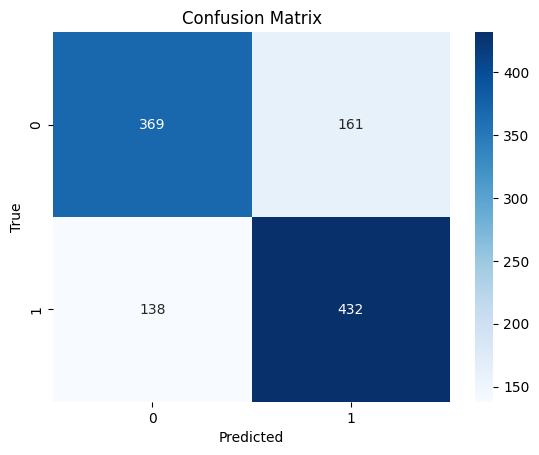

In [19]:
model = LogisticRegression(C=10,penalty = 'l1',solver = 'saga')
model.fit(train_data,train_labels)
predictions = model.predict(test_data)
print("Accuracy:",accuracy_score(test_labels,predictions))
print("Classification Report:\n",classification_report(test_labels,predictions))
cm = confusion_matrix(test_labels,predictions)
plt.figure(figure=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels = model.classes_,yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Accuracy: 0.6245454545454545
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.36      0.48       530
           1       0.59      0.87      0.71       570

    accuracy                           0.62      1100
   macro avg       0.66      0.62      0.59      1100
weighted avg       0.66      0.62      0.60      1100



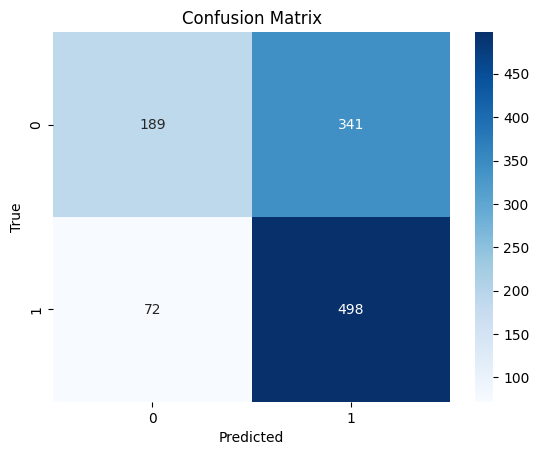

In [20]:
model = GaussianNB(var_smoothing = 1e-9)
model.fit(train_data,train_labels)
predictions = model.predict(test_data)
print("Accuracy:",accuracy_score(test_labels,predictions))
print("Classification Report:\n",classification_report(test_labels,predictions))
cm = confusion_matrix(test_labels,predictions)
plt.figure(figure=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels = model.classes_,yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Accuracy: 0.7263636363636363
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.77      0.73       530
           1       0.76      0.69      0.72       570

    accuracy                           0.73      1100
   macro avg       0.73      0.73      0.73      1100
weighted avg       0.73      0.73      0.73      1100



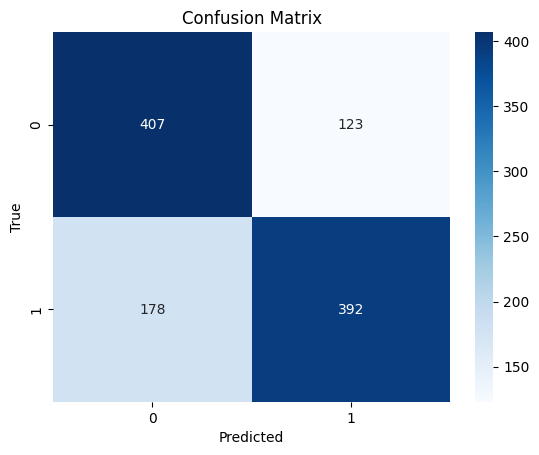

In [21]:
model = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, max_features= None,min_samples_leaf = 10, min_samples_split = 2)
model.fit(train_data,train_labels)
predictions = model.predict(test_data)
print("Accuracy:",accuracy_score(test_labels,predictions))
print("Classification Report:\n",classification_report(test_labels,predictions))
cm = confusion_matrix(test_labels,predictions)
plt.figure(figure=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels = model.classes_,yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Accuracy: 0.740909090909091
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.75      0.73       530
           1       0.76      0.74      0.75       570

    accuracy                           0.74      1100
   macro avg       0.74      0.74      0.74      1100
weighted avg       0.74      0.74      0.74      1100



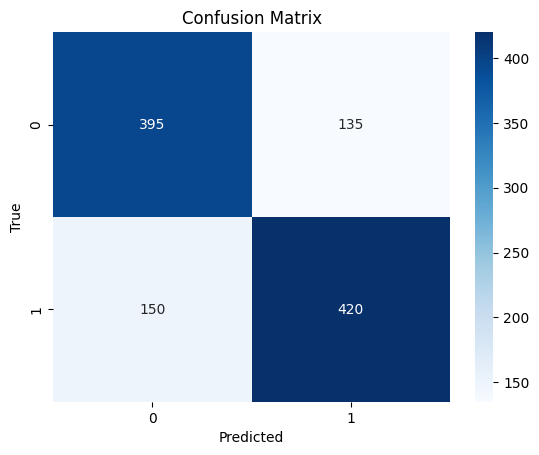

In [22]:
model = RandomForestClassifier(bootstrap = True, criterion = 'entropy', max_features = 'sqrt', n_estimators = 50)
model.fit(train_data,train_labels)
predictions = model.predict(test_data)
print("Accuracy:",accuracy_score(test_labels,predictions))
print("Classification Report:\n",classification_report(test_labels,predictions))
cm = confusion_matrix(test_labels,predictions)
plt.figure(figure=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels = model.classes_,yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Accuracy: 0.7536363636363637
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.77      0.75       530
           1       0.77      0.74      0.76       570

    accuracy                           0.75      1100
   macro avg       0.75      0.75      0.75      1100
weighted avg       0.75      0.75      0.75      1100



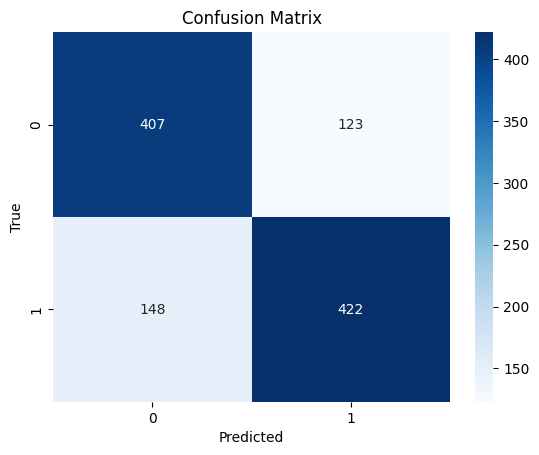

In [23]:
model = MLPClassifier(activation = 'relu', alpha = 0.1, learning_rate = 'constant', solver = 'adam')
model.fit(train_data,train_labels)
predictions = model.predict(test_data)
print("Accuracy:",accuracy_score(test_labels,predictions))
print("Classification Report:\n",classification_report(test_labels,predictions))
cm = confusion_matrix(test_labels,predictions)
plt.figure(figure=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels = model.classes_,yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Accuracy: 0.7418181818181818
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.76      0.74       530
           1       0.77      0.72      0.74       570

    accuracy                           0.74      1100
   macro avg       0.74      0.74      0.74      1100
weighted avg       0.74      0.74      0.74      1100



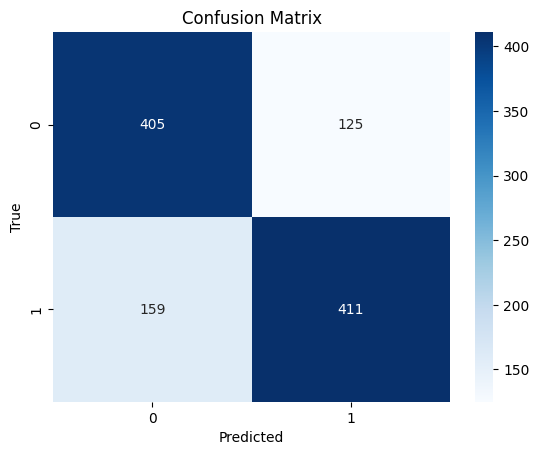

In [24]:
model = SVC(C = 10, degree = 3, gamma = 'auto', kernel = 'rbf')
model.fit(train_data,train_labels)
predictions = model.predict(test_data)
print("Accuracy:",accuracy_score(test_labels,predictions))
print("Classification Report:\n",classification_report(test_labels,predictions))
cm = confusion_matrix(test_labels,predictions)
plt.figure(figure=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels = model.classes_,yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()